# Tensor Basics

In [36]:
import torch
import numpy as np
import math

Everything in pytorch is based on Tensor operations. In this way pytorch resembles a lot the tensors that are supported within Numpy.

    A tensor can have different dimensions. So it can be 1d, 2d, 3d or a higher dimensional data structure.  
    Both numpy and pytorch will both support 1 data type within their ndarray or tensor data-structures.

Numpy supports a lot of machine learning algorithms (K-means, Decision-Trees, SVM, ...). Pytorch is more targeted to deep learning: Deep Neural Networks, CNN, RNN, LSTM, ...

Let's start off and make some numpy- and pytorch-tensors:

In [2]:
list1 = [[1,2,3,4],[5,6,7,8]]

In [3]:
nparray1 = np.array([1,2,3,4])
nparray2 = np.array(list1)
nparray3 = np.array([1,2,3,4], dtype=np.float64)

print(nparray1, type(nparray1), nparray1.dtype)

[1 2 3 4] <class 'numpy.ndarray'> int32


In [4]:
tensor1 = torch.tensor([1,2,3,4])
tensor2 = torch.tensor(list1)
tensor3 = torch.tensor([1,2,3,4], dtype=torch.float64)

print(tensor1, type(tensor1), tensor1.dtype) # some difference with numpy

tensor([1, 2, 3, 4]) <class 'torch.Tensor'> torch.int64


In [5]:
nparray1 = np.array([11,22,33])
tensor2 = torch.tensor(nparray1)
print(tensor2, type(tensor2), tensor2.dtype)

tensor([11, 22, 33], dtype=torch.int32) <class 'torch.Tensor'> torch.int32


They both will support the SAME underlying data structure storage.

In [6]:
nparr = tensor1.numpy()
nparr[1] = 999
tensor1, tensor1.dtype, nparr, nparr.dtype

(tensor([  1, 999,   3,   4]),
 torch.int64,
 array([  1, 999,   3,   4], dtype=int64),
 dtype('int64'))

Both content and the torch associated datatype are enherited from numpy.

## Scalar, vector, matrix, tensor

### What is a Tensor?

A tensor is a multidimensional array, a generalization of scalars, vectors, and matrices to more dimensions.

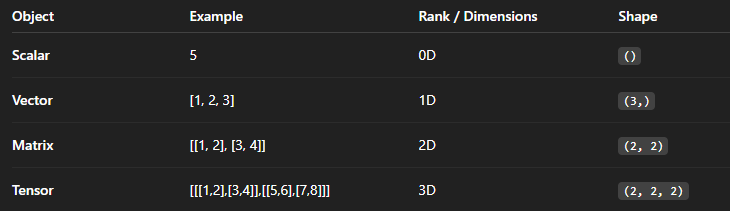

So:

Scalars → rank 0 tensors

Vectors → rank 1 tensors

Matrices → rank 2 tensors

Higher-order tensors → rank 3+ tensors


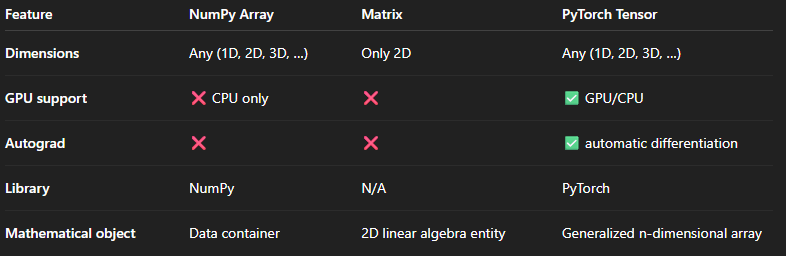

The simplest way to create a tensor is with the `torch.empty()` call:

In [7]:
x = torch.empty(3, 4)
print(x)
print(type(x))

tensor([[-4.0938e+00,  1.7460e-42,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])
<class 'torch.Tensor'>


Let's unpack what we just did:

* We created a tensor using one of the numerous methods attached to the `torch` module.
* The tensor itself is 2-dimensional, having 3 rows and 4 columns.
* The type of the object returned is a `torch.Tensor`, which is an alias for `torch.FloatTensor`; by default, PyTorch tensors are populated with **32-bit floating point numbers**.
* You will probably see some random-looking values when printing your tensor. The `torch.empty()` call **allocates memory** for the tensor, but **does not initialize** it with any values - so what you're seeing is whatever was in memory at the time of allocation.

A brief note about tensors and the number of dimensions, and terminology (just as in numpy):
* You will sometimes see a 1-dimensional tensor called a *vector.*
* Likewise, a 2-dimensional tensor is often referred to as a *matrix.*
* Anything with more than two dimensions is generally just called a tensor.

More often than not, you'll want to initialize your tensor with some value. Common cases are all zeros, all ones, or random values, and the `torch` module provides methods for all of these:

In [8]:
size = 3              # or size = (2,3,4,5), 4 dimension tensor, with 2 elements in dimension 1, 3 in dimension 2, ...
torch.empty(size)     # uninitiallized, so the elements are not equal to 0
torch.zeros(size)     # fill with 0
torch.ones(size)      # fill with 1
torch.manual_seed(42) # pseudo random generator that will always generate the same list of random numbers
torch.rand(size)      # fill with random numbers
torch.eye(3,3)        # identity matrix (all ones on the diagonal)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [9]:
x = torch.empty(1) # is a vector of dimension 1, with 1 scalar
x, type(x), x.dim()

(tensor([0.]), torch.Tensor, 1)

In [10]:
a = x.squeeze()    # remove any dimension that has as value 1. Here 'a' becomes a vector of dimension 0, a tensor scalar
a, type(a), type(a.item()), a.dim()


(tensor(0.), torch.Tensor, float, 0)

In [11]:
x = torch.ones(3) # 1D-vector, with 3 elements.
x, type(x), x.dim()

(tensor([1., 1., 1.]), torch.Tensor, 1)

In [12]:
a = x.squeeze()  # squeeze will not reduce the vector, it stays a vector (or 1D tensor)
a, type(a), a.dim()

# a, type(a), a.item(), a.dim() # a.item() will fail as a is a vector with 3 elements in it.

(tensor([1., 1., 1.]), torch.Tensor, 1)

In [13]:
x = torch.ones(2,3) # matrix, 2D
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [14]:
x = torch.ones((2,3)) # matrix, 2D
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [15]:
x = torch.ones(2,2,3) # tensor, 3 dimensions
#x = torch.ones(2,2,2,3) # tensor, 4 dimensions
x

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

### Random Tensors and Seeding
Let's look at some random tensors that pytorch can generate for us:

In [16]:
torch.manual_seed(1965)
# torch.rand(size): random numbers between [0, 1]
x = torch.rand(5, 3)

np.random.seed(1965) # comment and uncomment, to see if the seed of np impacts pytorch
y = np.random.rand(3, 4)

print(x, '\n', y)

tensor([[0.3986, 0.8081, 0.7166],
        [0.9441, 0.5144, 0.2535],
        [0.2772, 0.0277, 0.0915],
        [0.3987, 0.2100, 0.3095],
        [0.8158, 0.9789, 0.0327]]) 
 [[0.97421323 0.03795561 0.06841554 0.86045782]
 [0.14879492 0.59066393 0.8430305  0.65637787]
 [0.16804837 0.30667482 0.59742453 0.8058789 ]]


Did you notice the call to `torch.manual_seed()`. Random numbers are used e.g. when a model's learning weights have to be populated with some initial random values and at the same time there is a need to have some form of **reproducibility** of the results of your ML model. Manually setting your random number generator's seed is the way to do this. 


In [17]:
x = torch.zeros(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [18]:
# check size
x.size()

torch.Size([5, 3])

### Tensor Data Types

In [19]:
# check data type
x.dtype

torch.float32

In [20]:
# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)

In [21]:
# check type
x.dtype

torch.float16

In [22]:
# Creating a tensor t, based on the shape of another tensor

t = torch.ones_like(x)
# t = torch.zeros_like(x)
# t = torch.rand_like(x)
t

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float16)

In [23]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


The simplest way to set the underlying data type of a tensor is with an optional argument at creation time. In the first line of the cell above, we set `dtype=torch.int16` for the tensor `a`. When we print `a`, we can see that it's full of `1` rather than `1.` - Python's subtle cue that this is an integer type rather than floating point.

Another thing to notice about printing `a` is that, unlike when we left `dtype` as the default (32-bit floating point), printing the tensor also specifies its `dtype`.

In [24]:
b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

tensor([[11.1103, 15.3737, 14.7397],
        [15.6693,  0.5989, 12.2201]], dtype=torch.float64)


You may have also spotted that we went from specifying the tensor's shape as a series of integer arguments, to grouping those arguments in a tuple. This is not strictly necessary - PyTorch will take a series of initial, unlabeled integer arguments as a tensor shape - but when adding the optional arguments, it can make your intent more readable.

In [25]:
c = b.to(torch.int32)
print(c)

tensor([[11, 15, 14],
        [15,  0, 12]], dtype=torch.int32)


The other way to set the datatype is with the `.to()` method. In the cell above, we create a random floating point tensor `b` in the usual way. Following that, we create `c` by converting `b` to a 32-bit integer with the `.to()` method. Note that `c` contains all the same values as `b`, but truncated to integers.

Available data types include:

* `torch.bool`
* `torch.int8`
* `torch.uint8`
* `torch.int16`
* `torch.int32`
* `torch.int64`
* `torch.half`
* `torch.float`
* `torch.double`
* `torch.bfloat`

## Construct from data
You can create tensors also from lists of lists, tuples and a combination of list and tuples.

In [26]:
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


In [27]:
x = torch.tensor([1, 3])
print(x.size())
print(x.dtype) # all data is converted to 1 type. No mixture of datatypes in 1 tensor

torch.Size([2])
torch.int64


In [28]:
x = torch.tensor([5.5, 3])
print('x.dtype:', x.dtype) # all data is converted to 1 type. If 1 float => all float

x.dtype: torch.float32


## Operations

In [29]:
y = torch.rand(2, 2)
x = torch.rand(2, 2)

### elementwise addition

In [30]:
z = x + y
# torch.add(x,y)

### substraction

In [31]:
z = x - y
z = torch.sub(x, y)

### multiplication

In [32]:
z = x * y
z = torch.mul(x,y)

### division

In [33]:
z = x / y
z = torch.div(x,y)

### Altering Tensors in Place

Everything with a trailing underscore is an inplace operation. 
i.e. it will modify the variable on which this operation is performed.

Most binary operations on tensors will return a third, new tensor. When we say `c = a * b` (where `a` and `b` are tensors), the new tensor `c` will occupy a region of memory distinct from the other tensors.

There are times, though, that you may wish to alter a tensor in place - for example, if you're doing an element-wise computation where you can discard intermediate values. For this, most of the math functions have a version with an appended underscore (`_`) that will alter a tensor in place.


In [34]:
import numpy as np
a = torch.tensor([0, np.math.pi / 4, np.math.pi / 2, 3 * np.math.pi / 4])
print('a:')
print(a)
print(torch.sin(a))   # this operation creates a new tensor
print(a)              # a has not changed

a:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 2.3562])


In [37]:
b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('\nb:')
print(b)
print(torch.sin_(b))  # note the underscore
print(b)              # b has changed


b:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7071, 1.0000, 0.7071])


### Using the out argument

In [38]:
a = torch.rand(2, 3)
b = torch.rand(3, 2)
c = torch.zeros(2, 2)
old_id = id(c)

# Read and execute all cells until the end of this section. 
# Then come back and see what happens when you uncomment the following
# c = torch.zeros(2, 2).type(torch.int16)
c, c.dtype, c.dim()


(tensor([[0., 0.],
         [0., 0.]]),
 torch.float32,
 2)

In [39]:
print(c)
d = torch.matmul(a, b, out=c) # shape of c must match the a*b output AND the datatype (non-matching is deprecated)
print("c:\n", c)
print("d:\n", d)

tensor([[0., 0.],
        [0., 0.]])
c:
 tensor([[0.5826, 1.1159],
        [0.4806, 0.6479]])
d:
 tensor([[0.5826, 1.1159],
        [0.4806, 0.6479]])


In [40]:
assert id(c), old_id    # c is still pointing to the original position
assert c is d           # test to see if c & d are the same object (so not only containing the same values)

In [41]:
torch.rand(2, 2, out=c) # creating a new object
print(c)
assert id(c), old_id    # 
assert c is d           # test to see if c & d are the same object (so not only containing the same values)
print("c:\n", c)
print("d:\n", d)        # and the content of d has changed too

tensor([[0.8283, 0.7853],
        [0.8344, 0.7936]])
c:
 tensor([[0.8283, 0.7853],
        [0.8344, 0.7936]])
d:
 tensor([[0.8283, 0.7853],
        [0.8344, 0.7936]])


In [42]:
torch.rand(3, 3, out=c)  # deprecated behavior. 
print(c)
assert id(c), old_id   

tensor([[0.8009, 0.5538, 0.8687],
        [0.3332, 0.6917, 0.2184],
        [0.9283, 0.5022, 0.7530]])


## Broadcasting: as in Numpy

In [43]:
ones = torch.ones(2,2)
twos = ones*2
twos

tensor([[2., 2.],
        [2., 2.]])

In [44]:
powers_of_2 = twos ** torch.tensor([[1, 2], [3, 4]])
powers_of_2

tensor([[ 2.,  4.],
        [ 8., 16.]])

In [45]:
row_1_to_4 = torch.tensor([[1, 2, 3, 4]])
row_1_to_4.shape

torch.Size([1, 4])

In [46]:
ones_2_by_4 = torch.ones(2, 4) * 2
powers_of_2_of_2_by_4 = ones_2_by_4  ** row_1_to_4
powers_of_2_of_2_by_4 

tensor([[ 2.,  4.,  8., 16.],
        [ 2.,  4.,  8., 16.]])

## Broadcasting rules
The same rules as in numpy apply for broadcasting:

    - each tensor must have at least one dimension - no empty tensors
    - comparing the dimension sizes of the 2 tensors, going from last to first:
        - Each dimension must be equal between both tensors, or
        - One of the dimensions must be of size 1 (and the rest of the dimensions are identical), or
        - The dimension does not exist in one of the tensors.

In [47]:
a =      torch.ones(4, 3, 2)
# Example 1
b =  a * torch.rand(   3, 2) # 3rd & 2nd dims identical, 1 dimension missing
print(b, "\n")

# Example 2
c =  a * torch.rand(   3, 1) # 3rd dimension = 1, 2nd dim identical
print(c, "\n")

# Example 3
d =  a * torch.rand(   1, 2) # 3rd dimension identical, 2nd dim = 1
print(d, "\n")

tensor([[[0.3651, 0.0610],
         [0.3517, 0.3390],
         [0.9663, 0.9202]],

        [[0.3651, 0.0610],
         [0.3517, 0.3390],
         [0.9663, 0.9202]],

        [[0.3651, 0.0610],
         [0.3517, 0.3390],
         [0.9663, 0.9202]],

        [[0.3651, 0.0610],
         [0.3517, 0.3390],
         [0.9663, 0.9202]]]) 

tensor([[[0.7830, 0.7830],
         [0.2598, 0.2598],
         [0.2981, 0.2981]],

        [[0.7830, 0.7830],
         [0.2598, 0.2598],
         [0.2981, 0.2981]],

        [[0.7830, 0.7830],
         [0.2598, 0.2598],
         [0.2981, 0.2981]],

        [[0.7830, 0.7830],
         [0.2598, 0.2598],
         [0.2981, 0.2981]]]) 

tensor([[[0.4180, 0.3345],
         [0.4180, 0.3345],
         [0.4180, 0.3345]],

        [[0.4180, 0.3345],
         [0.4180, 0.3345],
         [0.4180, 0.3345]],

        [[0.4180, 0.3345],
         [0.4180, 0.3345],
         [0.4180, 0.3345]],

        [[0.4180, 0.3345],
         [0.4180, 0.3345],
         [0.4180, 0.3345]]]) 

## Exercise 

In [48]:
a =      torch.ones(4, 3, 2)

### Exercise: Without executing the below, will this result in an error or not?

In [ ]:
# Example 1
b =  a * torch.rand(4, 3) 
print(b)

### Exercise: Without executing the below, will this result in an error or not?

In [ ]:
# Example 3
c =  a * torch.rand(2, 3)
print(c)

### Exercise: Without executing the below, will this result in an error or not?

In [ ]:
# Example 3
d =  a * torch.rand((0,))
print(d)

### Exercise: Without executing the below, will this result in an error or not?

In [ ]:
# Example 4
e =  a * torch.rand((8,6,4))
print(e)

### Exercise: Without executing the below, will this result in an error or not?

In [ ]:
# Example 5
f =  a * torch.rand((1,1,2))
print(f)

### Exercise: Without executing the below, will this result in an error or not?

In [ ]:
# Example 6
a =      torch.ones(4, 1, 2)
g =  a * torch.rand((1, 4, 2))
print(g)

## Slicing
The same as in numpy.

In [50]:
x = torch.rand(5,3)
print(x)
print(x[:, 0]) # all rows, column 0
print(x[1, :]) # row 1 (2nd row!), all columns
print(x[1,1])  # a scalar!!!!! 1 element of the 2nd row and the 2nd column. 
print(x[1,0:2])  # 1 vector, with 2 elements: elements on 2nd row, first and second column
print(x[1,0:1])  # 1 vector, with 1 element: element on 2nd row, first column


tensor([[0.5825, 0.0354, 0.4563],
        [0.4303, 0.3897, 0.4971],
        [0.9058, 0.8818, 0.7816],
        [0.9663, 0.9589, 0.7311],
        [0.9055, 0.5666, 0.4707]])
tensor([0.5825, 0.4303, 0.9058, 0.9663, 0.9055])
tensor([0.4303, 0.3897, 0.4971])
tensor(0.3897)
tensor([0.4303, 0.3897])
tensor([0.4303])


In [51]:
print(type(x[1,1])) # returns a torch.Tensor!
a = x[1,1] # so a is also a tensor!
print(type(a), a.dim, a.dtype, a.item())

<class 'torch.Tensor'>
<class 'torch.Tensor'> <built-in method dim of Tensor object at 0x000001FBA5263A40> torch.float32 0.38969576358795166


### Get the actual value if only 1 element in your tensor
What if you wanted to get an actual value to use in 'normal non-torch' calculations 

In [52]:
print(x[1,1]) # returns a torch.Tensor!
print(type(x[1,1])) # returns a torch.Tensor!
print(x[1,1].item()) # will return the single element
print(type(x[1,1].item()))

tensor(0.3897)
<class 'torch.Tensor'>
0.38969576358795166
<class 'float'>


### Reduction operations

In [53]:
x = torch.rand(5,3)

In [54]:
max_tensor = x.max() # also returns a tensor
max = x.max().item()
print(max_tensor)
print(max)

tensor(0.9819)
0.9819204211235046


In [55]:
### Reshape with torch.view()
x = torch.randn(4, 4) # normally distributed random numbers
y = x.view(16)
z = x.view(-1, 8)  # the size of the parameter indicated with -1 is inferred from the other dimensions

print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [56]:
a = torch.arange(1,13).reshape(3,4)
print(a)
a.float().mean(dim=0) # mean by row
a.float().mean(dim=1) # mean by column

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


tensor([ 2.5000,  6.5000, 10.5000])

## Copying Tensors

As with any object in Python, assigning a tensor to a variable makes the variable a *label* of the tensor, and does not copy it. For example:

In [57]:
a = torch.ones(2, 2)
b = a

a[0][1] = 561  # we change a...
print(b)       # ...and b is also altered

tensor([[  1., 561.],
        [  1.,   1.]])


But what if you want a separate copy of the data to work on? The `clone()` method is there for you:

In [58]:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)               # ...but b is still all ones

tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


**There is an important thing to be aware of when using `clone()`.** If your source tensor has autograd, enabled then so will the clone. 

*In many cases, this will be what you want.* For example, if your model has multiple computation paths in its `forward()` method, and *both* the original tensor and its clone contribute to the model's output, then to enable model learning you want autograd turned on for both tensors. If your source tensor has autograd enabled (which it generally will if it's a set of learning weights or derived from a computation involving the weights), then you'll get the result you want.

On the other hand, if you're doing a computation where *neither* the original tensor nor its clone need to track gradients, then as long as the source tensor has autograd turned off, you're good to go.

*There is a third case,* though: Imagine you're performing a computation in your model's `forward()` function, where gradients are turned on for everything by default, but you want to pull out some values mid-stream to generate some metrics. In this case, you *don't* want the cloned copy of your source tensor to track gradients - performance is improved with autograd's history tracking turned off. For this last scenario, you can use the `.detach()` method on the source tensor:

In [59]:
a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

tensor([[0.8804, 0.3062],
        [0.8722, 0.6233]], requires_grad=True)
tensor([[0.8804, 0.3062],
        [0.8722, 0.6233]], grad_fn=<CloneBackward0>)
tensor([[0.8804, 0.3062],
        [0.8722, 0.6233]])
tensor([[0.8804, 0.3062],
        [0.8722, 0.6233]], requires_grad=True)


What's happening here?

* We create `a` with `requires_grad=True` turned on.
* When we print `a`, it informs us that the property `requires_grad=True` - this means that the gradients through autograd are turned on. And also that the computational history is on.
* We clone `a` and label it `b`. When we print `b`, we can see that it's tracking its computation history - it has inherited `a`'s autograd settings, and added to the computation history.
* We clone `a` into `c`, but we call `detach()` first.
* Printing `c`, we see no computation history, and there is also no `requires_grad=True`.

The `detach()` method *detaches the tensor from its computation history.* It says, "do whatever comes next as if autograd was off." It does this *without* changing `a` - you can see that when we print `a` again at the end, it retains its `requires_grad=True` property.


### Numpy & Pytorch

Converting a Torch Tensor to a NumPy array and vice versa is very easy

In [60]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


#### torch to numpy with .numpy()

In [61]:
b = a.numpy()
print(b)
print(type(b))

# Careful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other
a.add_(1)
print(a)
print(b)

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


#### numpy to torch with .from_numpy(x)

In [62]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

# again be careful when modifying
a += 1
print('a:', a)
print('b:', b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
a: [2. 2. 2. 2. 2.]
b: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### CPU vs GPU
The power of pytorch lies in performing calculations on the GPU. 

Your CPU does computation on data in your computer's RAM. Your GPU has dedicated memory attached to it. Whenever you want to perform a computation on a device, you must move *all* the data needed for that computation to memory accessible by that device. (Colloquially, "moving the data to memory accessible by the GPU" is shorted to, "moving the data to the GPU".)

By default all tensors are created on the CPU,
but you can also move them to the GPU (only if it's available).

One of the major advantages of PyTorch is its robust acceleration on CUDA-compatible Nvidia GPUs. ("CUDA" stands for *Compute Unified Device Architecture*, which is Nvidia's platform for parallel computing.) So far, everything we've done has been on CPU. How do we move to the faster hardware?

First, we should check whether a GPU is available, with the `is_available()` method.

**Note: If you do not have a CUDA-compatible GPU and CUDA drivers installed, the executable cells in this section will not execute any GPU-related code.**

By default, new tensors are created on the CPU, so we have to specify when we want to create our tensor on the GPU with the optional `device` argument. You can see when we print the new tensor, PyTorch informs us which device it's on (if it's not on CPU).

You can query the number of GPUs with `torch.cuda.device_count()`. If you have more than one GPU, you can specify them by index: `device='cuda:0'`, `device='cuda:1'`, etc.

As a coding practice, specifying our devices everywhere with string constants is pretty fragile. In an ideal world, your code would perform robustly whether you're on CPU or GPU hardware. You can do this by creating a device handle that can be passed to your tensors instead of a string:

In [63]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cuda
tensor([[0.0945, 0.8224],
        [0.5677, 0.2934]], device='cuda:0')


In [64]:
if torch.cuda.is_available(): # the rest of the code will only work, if you have a CUDA enabled installation 
                              # and NVIDIA-GPU(s) in your machine.
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    # z = z.numpy() # not possible because numpy cannot handle GPU tensors
    # move to CPU again
    z.to("cpu")       # ``.to`` can also change dtype together!
    # z = z.numpy()
else:
    print('cuda is not available.')

# So how is this being used in a real-life ML model?
Let's define a neural network (more on this later)

In [65]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class MyModel(torch.nn.Module):

    def __init__(self):
        super(MyModel, self).__init__()
        
        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = MyModel()

We then move the data and the model to the correct device:

In [66]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input = input.to(device)
output = output.to(device)
model = model.to(device)

If we are making use of dataloaders, which are iterables over the full data set - they will extract a batch of data out of the available dataset, then you will need to do the following:

In [ ]:
#Example:
from torch.utils.data import DataLoader

train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

epochs = 5
for epoch in range (epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        # backpropagation code here

        # evaluation code here
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)

## Manipulating Tensor Shapes

Sometimes, you'll need to change the shape of your tensor. Below, we'll look at a few common cases, and how to handle them.

### Changing the Number of Dimensions

One case where you might need to change the number of dimensions is passing a single instance of input to your model. PyTorch models generally expect *batches* of input.

For example, imagine having a model that works on 3 x 226 x 226 images - a 226-pixel square with 3 color channels. When you load and transform it, you'll get a tensor of shape `(3, 226, 226)`. Your model, though, is expecting input of shape `(N, 3, 226, 226)`, where `N` is the number of images in the batch. So how do you make a batch of one?

In [68]:
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)   # the parameter identifies the dimensions that will be added. In this case the first dimension.

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


The `unsqueeze()` method adds a dimension of extent 1. `unsqueeze(0)` adds it as a new zeroth dimension - now you have a batch of one!

So if that's *un*squeezing? What do we mean by squeezing? We're taking advantage of the fact that any dimension of extent 1 *does not* change the number of elements in the tensor.

In [69]:
c = torch.rand(1, 1, 1, 1, 1)
print(c)

tensor([[[[[0.7822]]]]])


Continuing the example above, let's say the model's output is a 10-element vector for each input. You would then expect the output to have shape `(N, 10)`, where `N` is the number of instances in the input batch. That means that for our single-input batch, we'll get an output of shape `(1, 10)`.

What if you want to do some *non-batched* computation with that output - something that's just expecting a 10-element vector?

In [70]:
a = torch.rand(1, 10)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

torch.Size([1, 10])
tensor([[0.3255, 0.7889, 0.1094, 0.5942, 0.8765, 0.2798, 0.1674, 0.9497, 0.7366,
         0.3146]])
torch.Size([10])
tensor([0.3255, 0.7889, 0.1094, 0.5942, 0.8765, 0.2798, 0.1674, 0.9497, 0.7366,
        0.3146])


You can see from the shapes that our 2-dimensional tensor is now 1-dimensional, and if you look closely at the output of the cell above you'll see that printing `a` shows an "extra" set of square brackets `[]` due to having an extra dimension.

You may only `squeeze()` dimensions of extent 1. 

In [71]:
c = torch.rand(2, 2)
print('c.shape:', c.shape)

d = c.squeeze(0)
print('d.shape:', d.shape)

c.shape: torch.Size([2, 2])
d.shape: torch.Size([2, 2])


See above where we try to squeeze a dimension of size 2 in `c`, and get back the same shape we started with. Calls to `squeeze()` and `unsqueeze()` can only act on dimensions of extent 1 because to do otherwise would change the number of elements in the tensor.

Another place you might use `unsqueeze()` is to ease broadcasting. Recall the example above where we had the following code:

```
a =     torch.ones(4, 3, 2)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)
```

The net effect of that was to broadcast the operation over dimensions 0 and 2, causing the random, 3 x 1 tensor to be multiplied element-wise by every 3-element column in `a`.

What if the random vector had just been  3-element vector? We'd lose the ability to do the broadcast, because the final dimensions would not match up according to the broadcasting rules. `unsqueeze()` comes to the rescue:

In [72]:
a = torch.ones(4, 3, 2)
b = torch.rand(   3)     # trying to multiply a * b will give a runtime error

In [73]:
# Uncomment the below line
# print(a * b)             # broadcasting will fail here!

In [74]:
c = b.unsqueeze(1)       # change to a 2-dimensional tensor, adding new dim at the end
print(c.shape)
print(a * c)             # broadcasting works again!

torch.Size([3, 1])
tensor([[[0.7681, 0.7681],
         [0.9078, 0.9078],
         [0.8799, 0.8799]],

        [[0.7681, 0.7681],
         [0.9078, 0.9078],
         [0.8799, 0.8799]],

        [[0.7681, 0.7681],
         [0.9078, 0.9078],
         [0.8799, 0.8799]],

        [[0.7681, 0.7681],
         [0.9078, 0.9078],
         [0.8799, 0.8799]]])


The `squeeze()` and `unsqueeze()` methods also have in-place versions, `squeeze_()` and `unsqueeze_()`:

In [75]:
batch_me = torch.rand(3, 226, 226)
print(batch_me.shape)
batch_me.unsqueeze_(0)
print(batch_me.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


Sometimes you'll want to change the shape of a tensor more radically, while still preserving the number of elements and their contents. One case where this happens is at the interface between a convolutional layer of a model and a linear layer of the model - this is common in image classification models. A convolution kernel will yield an output tensor of shape *features x width x height,* but the following linear layer expects a 1-dimensional input. `reshape()` will do this for you, provided that the dimensions you request yield the same number of elements as the input tensor has:

In [76]:
output3d = torch.rand(6, 20, 20)
print(output3d.shape)

input1d = output3d.reshape(-1) # or
# input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

torch.Size([6, 20, 20])
torch.Size([2400])


You can also call reshape as a method of the torch module:

In [77]:
print(torch.reshape(output3d, (6 * 20 * 20,)).shape)

torch.Size([2400])


*(Note: The `(6 * 20 * 20,)` argument in the final line of the cell above is because PyTorch expects a **tuple** when specifying a tensor shape - but when the shape is the first argument of a method, it lets us cheat and just use a series of integers. Here, we had to add the parentheses and comma to convince the method that this is really a one-element tuple.)*

When it can, `reshape()` will return a *view* on the tensor to be changed - that is, a separate tensor object looking at the same underlying region of memory. 

That means any change made to the source tensor will be reflected in the view on that tensor, unless you `clone()` it.

There *are* conditions, beyond the scope of this introduction, where `reshape()` has to return a tensor carrying a copy of the data. For more information, see the [docs](https://pytorch.org/docs/stable/torch.html#torch.reshape).